<a href="https://colab.research.google.com/github/Luuhlf/Quant-Analytics-/blob/volatilidade/carteira_teorica_x_Ibov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install yfinance 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.3 MB/s 
     |████████████████████████████████| 112 kB 10.2 MB/s 
     |████████████████████████████████| 110 kB 55.7 MB/s 
     |████████████████████████████████| 4.0 MB 62.0 MB/s 
     |████████████████████████████████| 128 kB 24.1 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [9]:
import pandas as pd
import yfinance as yf

In [10]:
ativos = ['PETR4', 'VALE3', 'ABEV3', 'WEGE3', 'EMBR3', 'RADL3', 'CVCB3', 'CIEL3', 'OIBR3', 'KNRI11']

In [12]:
inicio = '2020-01-01'
fim = '2022-11-01'

In [13]:
df = pd.DataFrame()

for i in ativos:
  ticker = str(i) + '.SA'
  df[i]  = yf.download(ticker, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
df.head()

,PETR4,VALE3,ABEV3,WEGE3,EMBR3,RADL3,CVCB3,CIEL3,OIBR3,KNRI11
Date,,,,,,,,,,
2020-01-02,14.581380,40.448143,17.020620,16.977915,20.200001,22.370581,44.709999,7.602682,0.86,188.743439
2020-01-03,14.462639,40.150345,16.781267,16.761112,20.410000,21.871857,44.200001,7.505097,0.86,188.743439
2020-01-06,14.633625,39.912102,16.861053,16.804470,20.379999,21.441311,43.820000,7.318801,0.92,187.211548
2020-01-07,14.576632,40.202457,16.896511,16.934555,20.500000,21.147142,44.400002,7.105891,0.94,187.939697
2020-01-08,14.486386,40.209896,16.816727,16.293785,20.330000,21.429630,44.340000,6.946208,0.92,177.301575


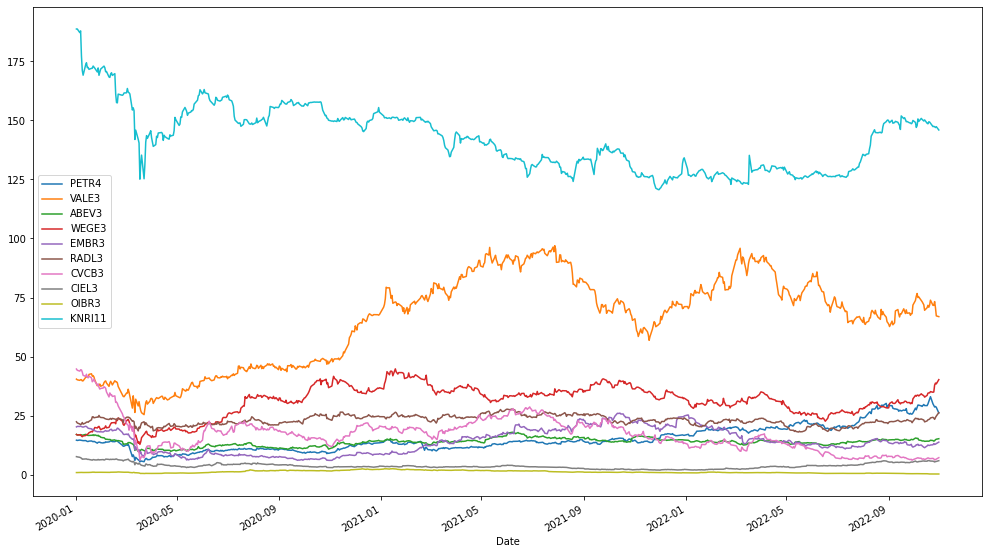

In [15]:
df.plot(figsize=(17,10));

#Criando carteira e comparando ao IBOV

In [22]:
carteira = ['BBDC4', 'JBSS3', 'MGLU3', 'WIZS3', 'MILS3', 'POSI3', 'OIBR3', 'KLBN11']

In [23]:
def retorna_ativos(ativos, iniciom, fim):
  df = pd.DataFrame()

  for i in ativos:
    ticker = str(i) + '.SA'
    df[i]  = yf.download(ticker, start = inicio, end = fim)['Adj Close']

  return df

In [24]:
precos = retorna_ativos(carteira, inicio, fim)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [26]:
precos.head()

,BBDC4,JBSS3,MGLU3,WIZS3,MILS3,POSI3,OIBR3,KLBN11
Date,,,,,,,,
2020-01-02,25.633940,22.084412,12.029737,11.357777,9.519655,8.927217,0.86,16.771223
2020-01-03,25.646914,22.303633,11.922435,11.357777,9.463217,8.733911,0.86,17.179396
2020-01-06,25.188803,21.775879,11.932189,11.975133,9.453809,8.373658,0.92,17.333593
2020-01-07,24.751207,22.165604,11.898048,12.639977,9.369148,8.681191,0.94,17.388018
2020-01-08,24.368322,22.709593,12.263843,11.793092,9.312707,8.470311,0.92,17.578493


##Quantos papeis comprados de cada ativo / "1000.00 em cada"

In [30]:
primeira_linha = precos.iloc[0]

In [31]:
primeira_linha

BBDC4     25.633940
JBSS3     22.084412
MGLU3     12.029737
WIZS3     11.357777
MILS3      9.519655
POSI3      8.927217
OIBR3      0.860000
KLBN11    16.771223
Name: 2020-01-02 00:00:00, dtype: float64

In [34]:
comprados = round(1000/primeira_linha, 0)

In [36]:
##Calcular o PL 
PL = precos*comprados

In [37]:
PL.head()

,BBDC4,JBSS3,MGLU3,WIZS3,MILS3,POSI3,OIBR3,KLBN11
Date,,,,,,,,
2020-01-02,999.723650,993.798523,998.468131,999.484344,999.563799,999.848251,1000.180017,1006.273384
2020-01-03,1000.229628,1003.663473,989.562089,999.484344,993.637762,978.197983,1000.180017,1030.763741
2020-01-06,982.363306,979.914551,990.371686,1053.811699,992.649922,937.849716,1069.960019,1040.015602
2020-01-07,965.297087,997.452164,987.538017,1112.318016,983.760567,972.293442,1093.219997,1043.281059
2020-01-08,950.364573,1021.931677,1017.898934,1037.792076,977.834229,948.674850,1069.960019,1054.709587


In [38]:
PL.tail()

,BBDC4,JBSS3,MGLU3,WIZS3,MILS3,POSI3,OIBR3,KLBN11
Date,,,,,,,,
2022-10-25,767.791672,1120.167389,356.069997,672.319988,1334.792933,1347.359970,290.750000,1220.464096
2022-10-26,734.324919,1072.160311,324.530007,657.359982,1322.269449,1232.000000,255.859999,1228.008499
2022-10-27,747.945105,1078.215237,350.259983,665.279995,1372.363286,1271.200043,267.490005,1219.303322
2022-10-28,752.225756,1115.410051,363.540009,679.359982,1311.833196,1284.640030,302.379989,1270.373611
2022-10-31,772.850630,1079.512653,371.009983,685.519997,1396.366639,1369.759949,290.750000,1254.704361


In [39]:
PL['Total Carteira'] = PL.iloc[:].sum(axis = 1)

In [41]:
PL.head()

,BBDC4,JBSS3,MGLU3,WIZS3,MILS3,POSI3,OIBR3,KLBN11,Total Carteira
Date,,,,,,,,,
2020-01-02,999.723650,993.798523,998.468131,999.484344,999.563799,999.848251,1000.180017,1006.273384,7997.340099
2020-01-03,1000.229628,1003.663473,989.562089,999.484344,993.637762,978.197983,1000.180017,1030.763741,7995.719036
2020-01-06,982.363306,979.914551,990.371686,1053.811699,992.649922,937.849716,1069.960019,1040.015602,8046.936502
2020-01-07,965.297087,997.452164,987.538017,1112.318016,983.760567,972.293442,1093.219997,1043.281059,8155.160349
2020-01-08,950.364573,1021.931677,1017.898934,1037.792076,977.834229,948.674850,1069.960019,1054.709587,8079.165946


In [42]:
PL.tail()

,BBDC4,JBSS3,MGLU3,WIZS3,MILS3,POSI3,OIBR3,KLBN11,Total Carteira
Date,,,,,,,,,
2022-10-25,767.791672,1120.167389,356.069997,672.319988,1334.792933,1347.359970,290.750000,1220.464096,7109.716045
2022-10-26,734.324919,1072.160311,324.530007,657.359982,1322.269449,1232.000000,255.859999,1228.008499,6826.513165
2022-10-27,747.945105,1078.215237,350.259983,665.279995,1372.363286,1271.200043,267.490005,1219.303322,6972.056974
2022-10-28,752.225756,1115.410051,363.540009,679.359982,1311.833196,1284.640030,302.379989,1270.373611,7079.762624
2022-10-31,772.850630,1079.512653,371.009983,685.519997,1396.366639,1369.759949,290.750000,1254.704361,7220.474211


In [43]:
##comparando com IBOV

ibov = yf.download('^BVSP', start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [44]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500


In [45]:
ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)

In [46]:
ibov = ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1)

In [47]:
ibov.head()

,IBOV
Date,
2020-01-02,118573.0
2020-01-03,117707.0
2020-01-06,116878.0
2020-01-07,116662.0
2020-01-08,116247.0


In [48]:
PL.index = pd.to_datetime(PL.index)

In [51]:
novo_df = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [52]:
df_normalizado = novo_df/novo_df.iloc[0]

In [53]:
df_normalizado.head()

,IBOV,BBDC4,JBSS3,MGLU3,WIZS3,MILS3,POSI3,OIBR3,KLBN11,Total Carteira
Date,,,,,,,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-03,0.992696,1.000506,1.009927,0.991080,1.000000,0.994071,0.978346,1.000000,1.024338,0.999797
2020-01-06,0.985705,0.982635,0.986029,0.991891,1.054355,0.993083,0.937992,1.069767,1.033532,1.006202
2020-01-07,0.983883,0.965564,1.003676,0.989053,1.112892,0.984190,0.972441,1.093023,1.036777,1.019734
2020-01-08,0.980383,0.950627,1.028309,1.019461,1.038327,0.978261,0.948819,1.069767,1.048134,1.010232


In [54]:
df_normalizado.tail()

,IBOV,BBDC4,JBSS3,MGLU3,WIZS3,MILS3,POSI3,OIBR3,KLBN11,Total Carteira
Date,,,,,,,,,,
2022-10-25,0.966712,0.768004,1.127157,0.356616,0.672667,1.335375,1.347564,0.290698,1.212855,0.889010
2022-10-26,0.951009,0.734528,1.078851,0.325028,0.657699,1.322846,1.232187,0.255814,1.220353,0.853598
2022-10-27,0.966839,0.748152,1.084943,0.350797,0.665623,1.372962,1.271393,0.267442,1.211702,0.871797
2022-10-28,0.965979,0.752434,1.122370,0.364098,0.679710,1.312406,1.284835,0.302326,1.262454,0.885265
2022-10-31,0.978612,0.773064,1.086249,0.371579,0.685874,1.396976,1.369968,0.290698,1.246882,0.902859


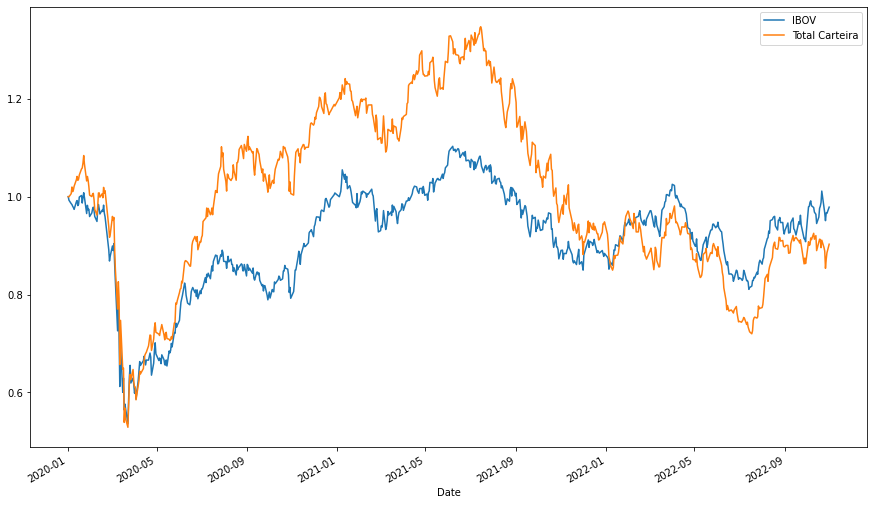

In [58]:
df_normalizado[['IBOV', 'Total Carteira']].plot(figsize = (15,9));